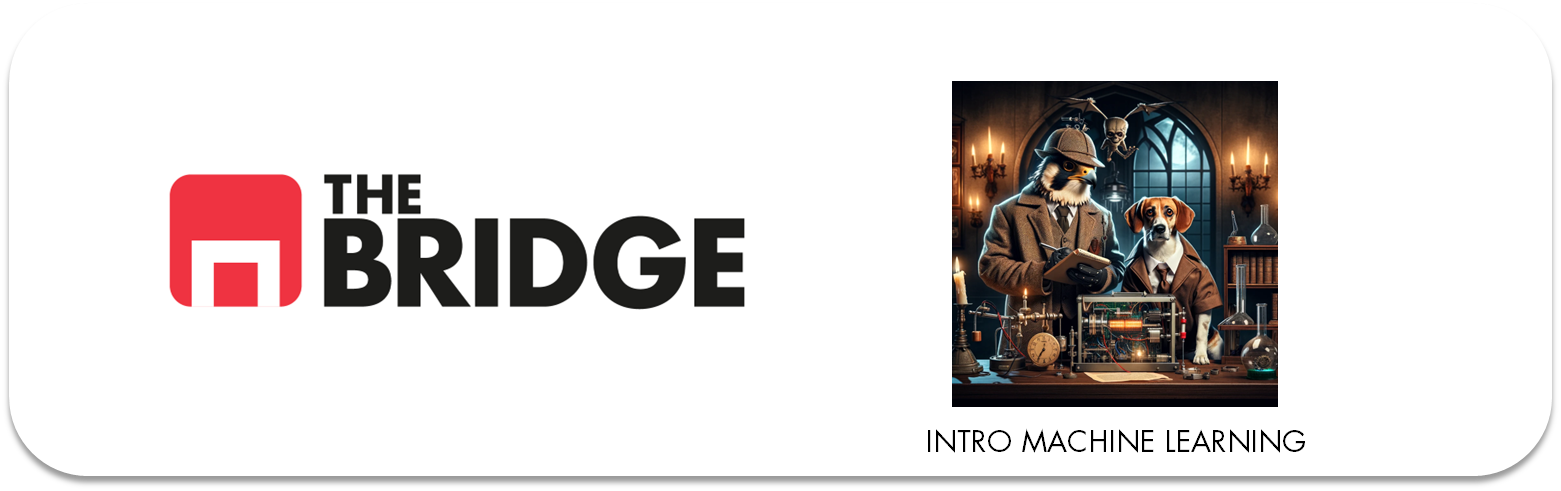

*NOTA: [Adaptado de "Hands-On Machine Learning with Scikit-Learn, Kera, and Tensorflow" de Aurelien Geron]*

## ML INTRO PRACTICA (II): EDA

In [2]:
# Recuperemos lo hecho en la sesión anterior

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split


# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


df_inmo = pd.read_csv("./data/ejemplo_housing.csv")

train_set, test_set = train_test_split(df_inmo, test_size=0.2, random_state=42)

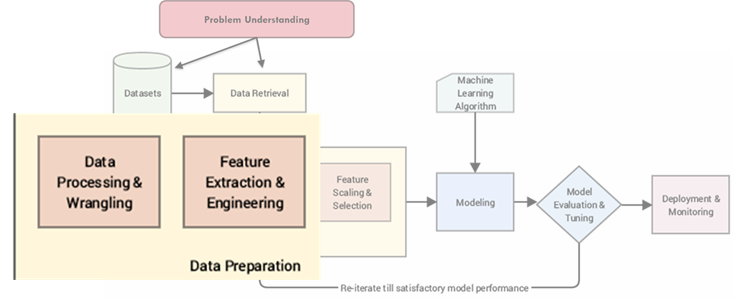

### 1. Limpieza y transformación

Deberíamos acometer la limpieza y transformación, pero como ya vimos no hay valores nulos y los datos parecen bastante limpios

In [3]:
df_inmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Unicamente parece interesante convertir "mean_income" en una variable categórica, porque ya de por sí se ha intentado hacer un escalado con la misma. Esto es algo que ya hicimos varias veces cuando analizamos datos, recurriendo a la función `cut` de pandas. Hagámoslo:


In [ ]:
train_set["income_cat"] = pd.cut(train_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
train_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

[NOTA: Importante, toda transformación que se haga en las variables de train habrá que hacerlas en los datos de test antes de poder aplicarles el modelo]

### 2. Análisis univariante

En un proceso estricto y formal de ML ahora haríamos el análisis univariante de todas las variables. Por simplicidad vamos a repetir únicamente el código para ver las distribuciones de las numéricas y las frecuencias de las categóricas:

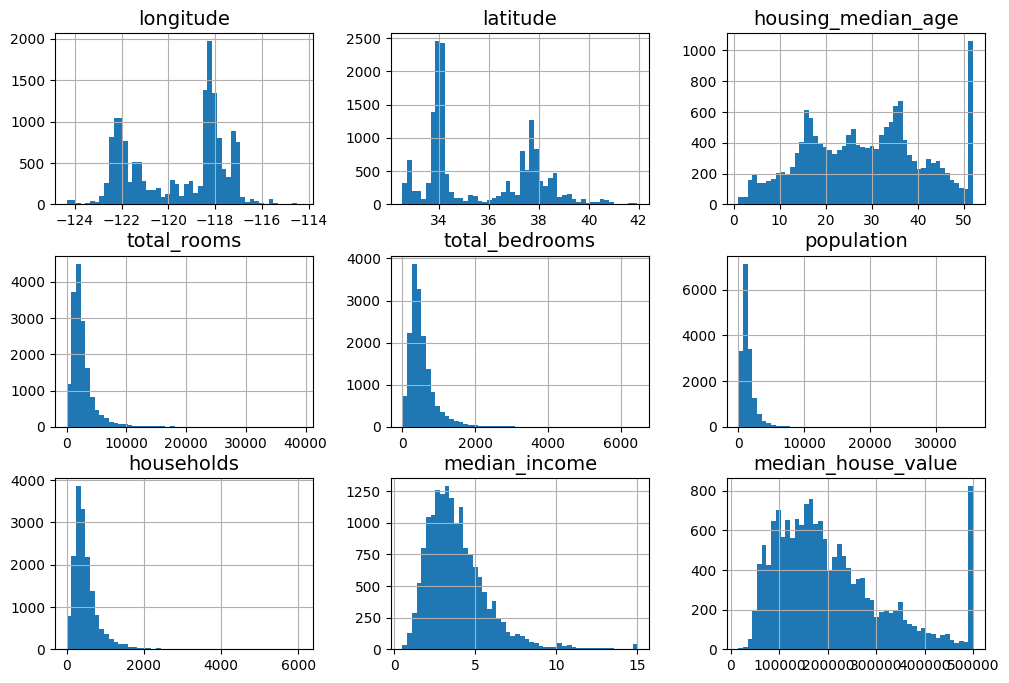

In [4]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

Y las frecuencias:


In [ ]:
pinta_distribucion_categoricas(train_set, ["income_cat","ocean_proximity"], relativa= True, mostrar_valores= True)

La distribución numérica sigue las mismas pautas, como era de esperar, cuando hicimos el primer vistazo y se mantienen las mismas consideraciones. 

Respecto a las frecuencias, el income de nivel 3 es el más frecuente, el income de nivel 1 el menor y que la mayoría de las zonas no son costeras y además que apenas hay zonas en islas.

No podemos forzar más y tampoco lo necesitamos. Lo realmente importante es ver algunas combinaciones y el bivariante con el target "mean_house_value", eso sí también tendremos que decidir que hacer con los "capados" de esta y de la variable "housing_median_age".

### 2. Análisis Multivariante

#### 2.1 Variables Categóricas vs Target

Empecemos con la proximidad al océano: 

In [ ]:
plot_categorical_numerical_relationship(train_set, categorical_col= "ocean_proximity", numerical_col="median_house_value")

Claramente parece que hay relación entre esta variable y el target, me la quedaré como feature. Dado que tenemos los valores geográficos (latitud y longitud), podemos comprobar esta relación y además ver el bivariante con esas dos variables haciendo una visualización:

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(train_set["longitude"], train_set["latitude"], c = train_set["median_house_value"], cmap = "jet")
plt.grid()
plt.xlabel("longitud")
plt.ylabel("latitud")
cbar = plt.colorbar(label = "Mediana Precios ($)")


[EXTRA: Usando pandas directamente y añadiendo la población como tamaño de la burbuja]

In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=train_set["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

Seguramente podríamos hasta simplificar la variable en dos o tres valores (costero, no costero, isla). Pero no lo vamos a hacer.

In [ ]:
plot_categorical_numerical_relationship(train_set, categorical_col= "income_cat", numerical_col="median_house_value")

No hace falta decir nada no. Ahora cuando veamos las relaciones numéricas, lo veremos con el "mean_income". Esta es otra variable que nos quedaremos como feature.

#### 2.2 Variables numéricas y target

Por simplificar, directamente iremos a las correlaciones de las variables numéricas con la variable target y pintando las más significativas:

In [4]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687342
total_rooms           0.134610
housing_median_age    0.107896
households            0.067969
total_bedrooms        0.053060
population           -0.020492
longitude            -0.046563
latitude             -0.143382
Name: median_house_value, dtype: float64

In [13]:
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925013,-0.109435,0.045880,0.070340,0.100870,0.057827,-0.017836,-0.046563
latitude,-0.925013,1.000000,0.010855,-0.036982,-0.067736,-0.109545,-0.072395,-0.076479,-0.143382
housing_median_age,-0.109435,0.010855,1.000000,-0.361626,-0.321742,-0.296413,-0.304603,-0.116554,0.107896
total_rooms,0.045880,-0.036982,-0.361626,1.000000,0.931349,0.860648,0.921526,0.200730,0.134610
total_bedrooms,0.070340,-0.067736,-0.321742,0.931349,1.000000,0.879252,0.980959,-0.002162,0.053060
population,0.100870,-0.109545,-0.296413,0.860648,0.879252,1.000000,0.907937,0.011478,-0.020492
households,0.057827,-0.072395,-0.304603,0.921526,0.980959,0.907937,1.000000,0.018001,0.067969
median_income,-0.017836,-0.076479,-0.116554,0.200730,-0.002162,0.011478,0.018001,1.000000,0.687342
median_house_value,-0.046563,-0.143382,0.107896,0.134610,0.053060,-0.020492,0.067969,0.687342,1.000000


Como era de esperar "median_income" es claramente la que tiene más correlación, y podríamos descartar población y las geográficas que hemos visto que hasta cierto punto están contenidas en la categórica de cercanía al mar (quizás la latitud podríamos quedárnosla)

In [14]:
columnas = corr_matrix["median_house_value"][corr_matrix["median_house_value"] > 0.07].index.to_list()

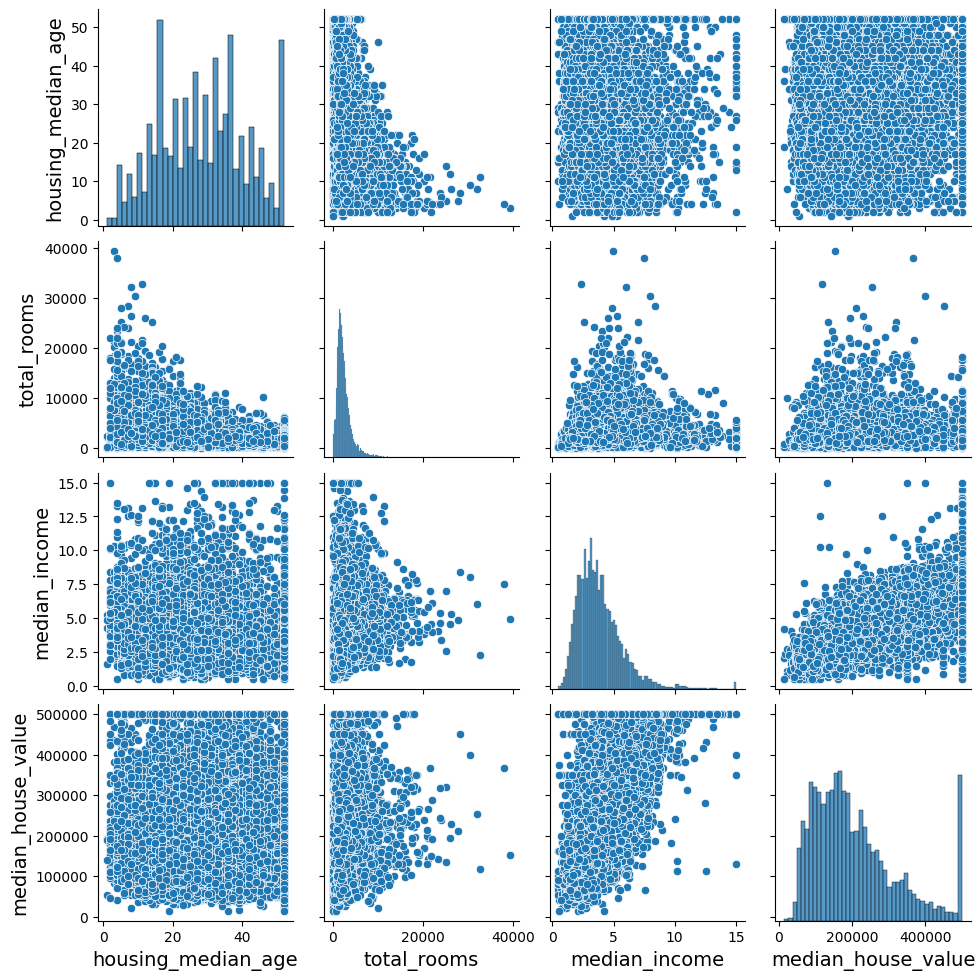

In [15]:
sns.pairplot(train_set[columnas]);

Como era de esperar gráficamente la "posible" correlación más potente es con "median_income". Pero en este caso no vamos a descartar las otras, y nos quedaremos con la categórica en vez de con "median_income". 

### 2.3 Crear otras variables

En este caso, podríamos pensar que quizás algunas variables combinadas puedan ser interesantes por ejemplo:  
1. El número medio de habitaciones por casa ("total_rooms"/"households")  
2. El número de dormitorios en función del total de habitaciones ("total_bedrooms"/"total_rooms")
3. O el número medio de personas por casas ("population"/"housholds")

Creemos estas variables y veamos su correlación con el target

In [ ]:
train_set["rooms_per_house"] = train_set["total_rooms"] / train_set["households"]
train_set["bedrooms_ratio"] = train_set["total_bedrooms"] / train_set["total_rooms"]
train_set["people_per_house"] = train_set["population"] / train_set["households"]

In [ ]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

Hmm, interesante porque hemos encontrado una "mejor" correlación en habitaciones por casa "rooms_per_house" pero más interesante es la nueva variable ratio de dormitorios, que presenta una contraintuitiva "anticorrelación". Es decir a menor ratio de dormitorios por habitaciones mayor precio.

### 3. Lista de Features

Para terminar, hacemos nuestra lista de features [Nota: A medida que veamos algoritmos y más llegados a las redes, dejaremos que sea el modelo el que se encargue incluso de esta selección pero es bueno que lo practiquemos y lo entendamos]

1. ocean_proximity
2. income_cat
3. rooms_per_house
4. total_rooms
5. housing_median_age
6. bedrooms_ratio